In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hypertools as hyp
from glob import glob as lsdir
import os
import re
import datetime as dt
import plotly_express as px

from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

%matplotlib inline

In [25]:
data_readers = {'xlsx': pd.read_excel, 'xls': pd.read_excel, 'dta': pd.read_stata}
get_extension = lambda x: x.split('.')[-1]

In [26]:
def read_data(datadir, readers):
    files = lsdir(os.path.join(datadir, '*'))
    readable_files = []
    data = []
    for f in files:
        ext = get_extension(f)
        if ext in readers.keys():
            readable_files.append(f)
            data.append(data_readers[ext](f))
    return readable_files, data

In [27]:
fnames, data = read_data('data', data_readers)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [28]:
fnames

['data/UVLTdata_individual.dta',
 'data/UVLTdata_final.dta',
 'data/Direct Mailing Analysis.xlsx',
 'data/UVLTDataAnalysis.xls',
 'data/TownLevelData.xlsx',
 'data/TownLevelData.dta',
 'data/CensusInfoUpperValley2015JH.xlsx']

In [29]:
data[4].head()

,TownID,Town,Nprojects,Nacres,Nmembers,MedianHHIncome,MeanHHIncome,PercBAplus,PercAge55Plus
0,1,Bath,9,746.00,0,47386,60413,25.274725,48.844538
1,2,Bradford,20,2258.32,7,48056,58716,30.600000,32.912306
2,3,Canaan,9,1676.35,10,58333,68870,25.300000,33.863520
3,4,Cavendish,0,0.00,0,48750,69230,31.001727,40.359043
4,5,Charlestown,2,408.90,2,42693,50823,14.300000,36.050905


In [30]:
data[4].columns.values

array(['TownID', 'Town', 'Nprojects', 'Nacres', 'Nmembers',
       'MedianHHIncome', 'MeanHHIncome', 'PercBAplus', 'PercAge55Plus'],
      dtype=object)

In [31]:
data[4].drop(['Nprojects', 'Nacres', 'Nmembers',
       'MedianHHIncome', 'MeanHHIncome', 'PercBAplus'], inplace=True, axis=1)

In [32]:
data[4].head()

,TownID,Town,PercAge55Plus
0,1,Bath,48.844538
1,2,Bradford,32.912306
2,3,Canaan,33.863520
3,4,Cavendish,40.359043
4,5,Charlestown,36.050905


In [33]:
data[3].head()

,ContactID,FirstName,LastName,City,State,ZipCode,TownID,Town,LandOwnerTownID,DeceasedDate,...,E-2010-11,E-2011-12,E-2012-13,E-2013-14,E-2014-15,E-2015-16,E-2016-17,E-2017-18,E-2018-19,E-2019-20
0,1544,Charles ...,Pitman,Chapel Hill,NC,27517,60,All Other Towns,0,NaT,...,0,0,0,0,0,0,0,0,0,0
1,1545,Pat,Reed,Lebanon,NH,03766,20,Lebanon,0,NaT,...,0,0,0,0,0,0,0,0,0,0
2,1546,David,Davenport,New London,NH,03257,61,All Other Towns NH,0,NaT,...,0,0,0,0,0,0,0,0,0,0
3,1547,Patricia,Stevens,Ascutney,VT,05030,41,Weathersfield,41,NaT,...,0,0,0,0,0,0,0,0,0,0
4,1548,Margaret Elizabeth,Stevens,Springfield,VT,05156,34,Springfield,0,2016-05-08,...,0,0,0,0,0,0,0,0,0,0


In [34]:
data[3].columns.values

array(['ContactID', 'FirstName', 'LastName', 'City', 'State', 'ZipCode',
       'TownID', 'Town', 'LandOwnerTownID', 'DeceasedDate',
       'DeceasedDateYN', 'U_Tot_Amt', 'U_Tot_Cnt', 'U-2000-01',
       'U-2001-02', 'U-2002-03', 'U-2003-04', 'U-2004-05', 'U-2005-06',
       'U-2006-07', 'U-2007-08', 'U-2008-09', 'U-2009-10', 'U-2010-11',
       'U-2011-12', 'U-2012-13', 'U-2013-14', 'U-2014-15', 'U-2015-16',
       'U-2016-17', 'U-2017-18', 'U-2018-19', 'U-2019-20', 'R-Tot-Amt',
       'R-Tot-Cnt', 'R-2000-01', 'R-2001-02', 'R-2002-03', 'R-2003-04',
       'R-2004-05', 'R-2005-06', 'R-2006-07', 'R-2007-08', 'R-2008-09',
       'R-2009-10', 'R-2010-11', 'R-2011-12', 'R-2012-13', 'R-2013-14',
       'R-2014-15', 'R-2015-16', 'R-2016-17', 'R-2017-18', 'R-2018-19',
       'R-2019-20', 'V-Tot-Cnt', 'V-2000-01', 'V-2001-02', 'V-2002-03',
       'V-2003-04', 'V-2004-05', 'V-2005-06', 'V-2006-07', 'V-2007-08',
       'V-2008-09', 'V-2009-10', 'V-2010-11', 'V-2011-12', 'V-2012-13',
       'V-2

In [35]:
data[3].drop(['TownID', 'Town', 'LandOwnerTownID', 'DeceasedDate',
       'DeceasedDateYN','U_Tot_Cnt', 'U-2000-01',
       'U-2001-02', 'U-2002-03', 'U-2003-04', 'U-2004-05', 'U-2005-06',
       'U-2006-07', 'U-2007-08', 'U-2008-09', 'U-2009-10', 'U-2010-11',
       'U-2011-12', 'U-2012-13', 'U-2013-14', 'U-2014-15', 'U-2015-16',
       'U-2016-17', 'U-2017-18', 'U-2018-19', 'U-2019-20', 'R-Tot-Amt',
       'R-Tot-Cnt', 'R-2000-01', 'R-2001-02', 'R-2002-03', 'R-2003-04',
       'R-2004-05', 'R-2005-06', 'R-2006-07', 'R-2007-08', 'R-2008-09',
       'R-2009-10', 'R-2010-11', 'R-2011-12', 'R-2012-13', 'R-2013-14',
       'R-2014-15', 'R-2015-16', 'R-2016-17', 'R-2017-18', 'R-2018-19',
       'R-2019-20', 'V-Tot-Cnt', 'V-2000-01', 'V-2001-02', 'V-2002-03',
       'V-2003-04', 'V-2004-05', 'V-2005-06', 'V-2006-07', 'V-2007-08',
       'V-2008-09', 'V-2009-10', 'V-2010-11', 'V-2011-12', 'V-2012-13',
       'V-2013-14', 'V-2014-15', 'V-2015-16', 'V-2016-17', 'V-2017-18',
       'V-2018-19', 'V-2019-20', 'E-Tot-Cnt', 'E-2000-01', 'E-2001-02',
       'E-2002-03', 'E-2003-04', 'E-2004-05', 'E-2005-06', 'E-2006-07',
       'E-2007-08', 'E-2008-09', 'E-2009-10', 'E-2010-11', 'E-2011-12',
       'E-2012-13', 'E-2013-14', 'E-2014-15', 'E-2015-16', 'E-2016-17',
       'E-2017-18', 'E-2018-19', 'E-2019-20'], inplace=True, axis=1)

In [36]:
data[3].head()

,ContactID,FirstName,LastName,City,State,ZipCode,U_Tot_Amt
0,1544,Charles ...,Pitman,Chapel Hill,NC,27517,571.95
1,1545,Pat,Reed,Lebanon,NH,03766,0.00
2,1546,David,Davenport,New London,NH,03257,600.00
3,1547,Patricia,Stevens,Ascutney,VT,05030,0.00
4,1548,Margaret Elizabeth,Stevens,Springfield,VT,05156,0.00


In [37]:
data[3].columns.values

array(['ContactID', 'FirstName', 'LastName', 'City', 'State', 'ZipCode',
       'U_Tot_Amt'], dtype=object)

In [38]:
bigdata = pd.concat([data[3],data[4]], axis=1)

In [75]:
bigdata.head(20)

,ContactID,FirstName,LastName,City,State,ZipCode,U_Tot_Amt,TownID,Town,PercAge55Plus
0,1544,Charles ...,Pitman,Chapel Hill,NC,27517,571.95,1.0,Bath,48.844538
1,1545,Pat,Reed,Lebanon,NH,03766,0.00,2.0,Bradford,32.912306
2,1546,David,Davenport,New London,NH,03257,600.00,3.0,Canaan,33.863520
3,1547,Patricia,Stevens,Ascutney,VT,05030,0.00,4.0,Cavendish,40.359043
4,1548,Margaret Elizabeth,Stevens,Springfield,VT,05156,0.00,5.0,Charlestown,36.050905
5,1549,Steven,Stocking,Fairlee,VT,05045,0.00,6.0,Chelsea,37.884471
6,1550,Jim,Taylor,Meriden,NH,03770,0.00,7.0,Claremont,27.844907
7,1551,Gerd,Riess,East Thetford,VT,05043,0.00,8.0,Corinth,33.715596
8,1552,Ruth,Hubbard,Lebanon,NH,03766,0.00,9.0,Cornish,38.562874
9,1553,Valerie,Mullen,Vershire,VT,05079,0.00,10.0,Croydon,36.054422


# Data Visualization 
## What is the average age of people who donated?

In [78]:
px.scatter(bigdata, x="Town", y="PercAge55Plus", hover_name="U_Tot_Amt")

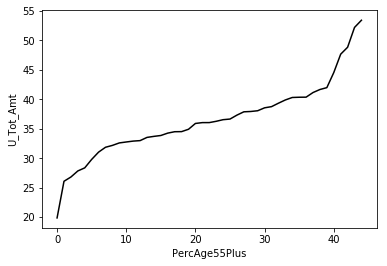

In [51]:
plt.plot(np.sort(bigdata.PercAge55Plus), 'k-');
plt.xlabel('PercAge55Plus');
plt.ylabel('U_Tot_Amt');